# Australian forecast skill

This notebook contains plots showing the skill of quantities averaged over the Natural Resource Management (NRM) super-cluster regions (see https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/). As for the generic skill results, plots are shown for CAFE-f6 and for the CanESM5 and EC-Earth3 CMIP6 DCPP submissions. 30-year climatological and verification periods are used for both the CAFE-f6 and CMIP6 data. However, because the historical CMIP6 data end in 2014, these periods differ slightly: 1991-2020 for CAFE-f6; 1985-2014 for CanESM5 and EC-Earth3. Note also that the CanESM5 hindcasts are initialised at the end of December every year, while the CAFE-f6 and EC-Earth3 hindcasts are initialised at the beginning of November every year.

Significant points (as identified by a non-parametric block bootstrapping procedure) are shown by filled circles for the line plots.

If you wish to see anything added to these results, please contact Dougie.

In [1]:
import numpy as np

import xarray as xr

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

import geopandas

from src import plot

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
def plot_metrics(
    hindcasts,
    reference,
    timescales,
    variable,
    metrics,
    verif_period=None,
):
    """
    Helper function for plotting some skill metrics.
    """

    def _load_skill_metric(
        hindcast, reference, timescale, variable, metric, verif_period=None
    ):
        """Load a skill metric"""
        SKILL_DIR = "../data/skill/"
        if hindcast == "CAFEf6":
            anom_period = "1991-2020"
        else:
            anom_period = "1985-2014"
        if verif_period is None:
            verif_period = anom_period
        file = (
            f"{SKILL_DIR}/{hindcast}.{reference}.{timescale}.anom_{anom_period}"
            f".{variable}_Aus_NRM.{metric}_{verif_period}.zarr"
        )
        return xr.open_zarr(file).compute()

    regions = [
        "Northern Australia",
        "Rangelands",
        "Eastern Australia",
        "Southern Australia",
        "Australia",
    ]

    panels = []
    headings = []
    for region in regions:
        row_list = []
        for timescale in timescales:
            metric_dict = {}
            for hindcast in hindcasts:
                model_metrics = {}
                for metric in metrics:
                    try:
                        model_metrics[metric] = _load_skill_metric(
                            hindcast,
                            reference,
                            timescale,
                            f"{variable}",
                            metric,
                            verif_period,
                        ).sel(region=region)
                    except:
                        pass
                metric_dict[hindcast] = model_metrics
            row_list.append(metric_dict)
        panels.append(row_list)
        headings.append([f"{region}, {timescale}" for timescale in timescales])
    return plot.metrics(panels, variable, headings, figsize=(9, 12))

## Focus regions
In the following we'll show some skill results for the following NRM super clusters and for the average over all of Australia

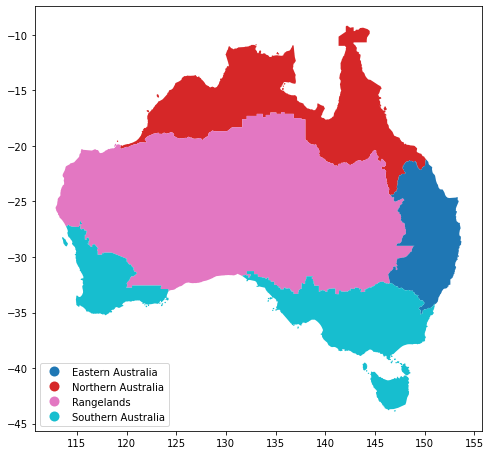

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
df = geopandas.read_file("../data/raw/NRM_super_clusters/NRM_super_clusters.shp")
_ = df.plot("label", ax=ax, legend=True, legend_kwds={"loc": "lower left"})

## Near-surface (2m) temperature relative to JRA55

### Anomaly correlation coefficient

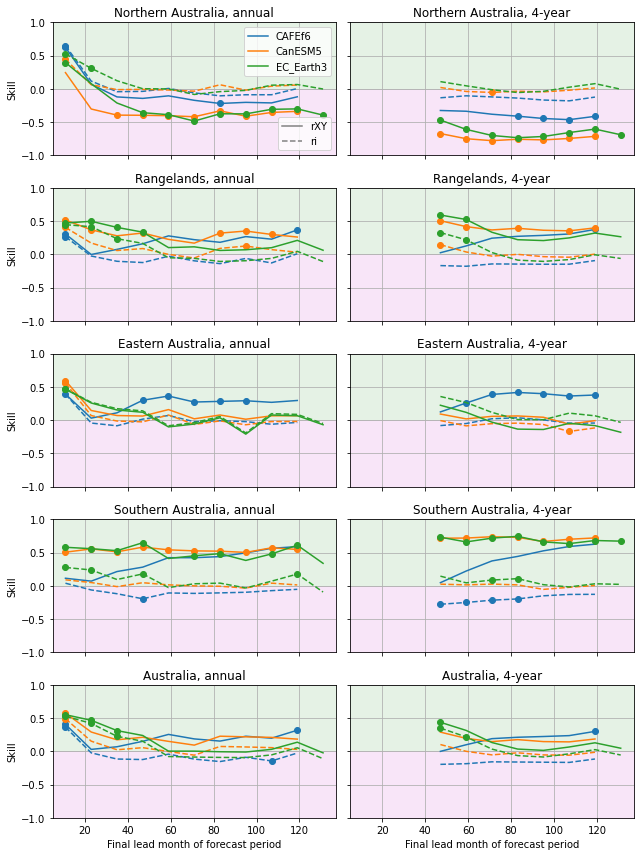

In [5]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["rXY", "ri"],
)

### Mean squared skill score relative to historical simulations

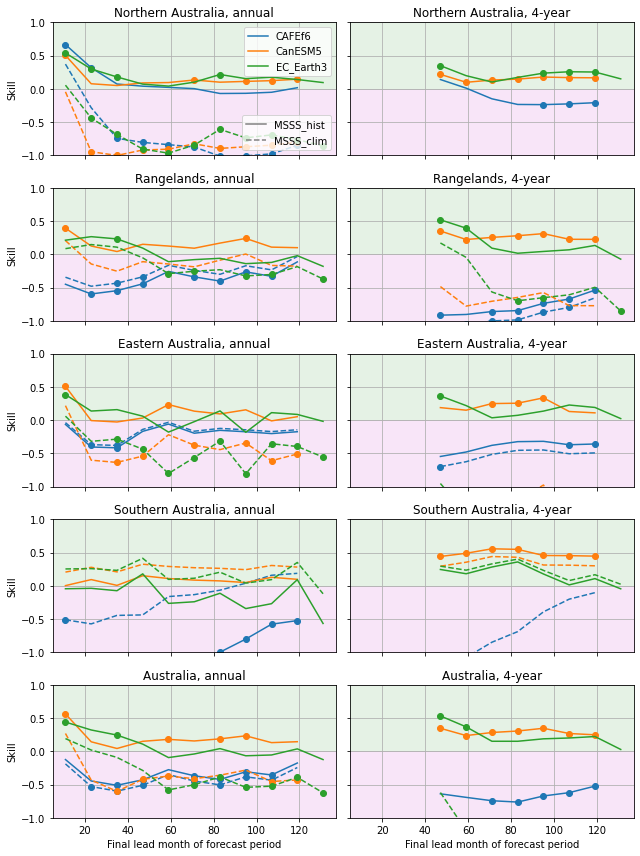

In [6]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["MSSS_hist", "MSSS_clim"],
)

### Rank probability skill score relative to historical simulations

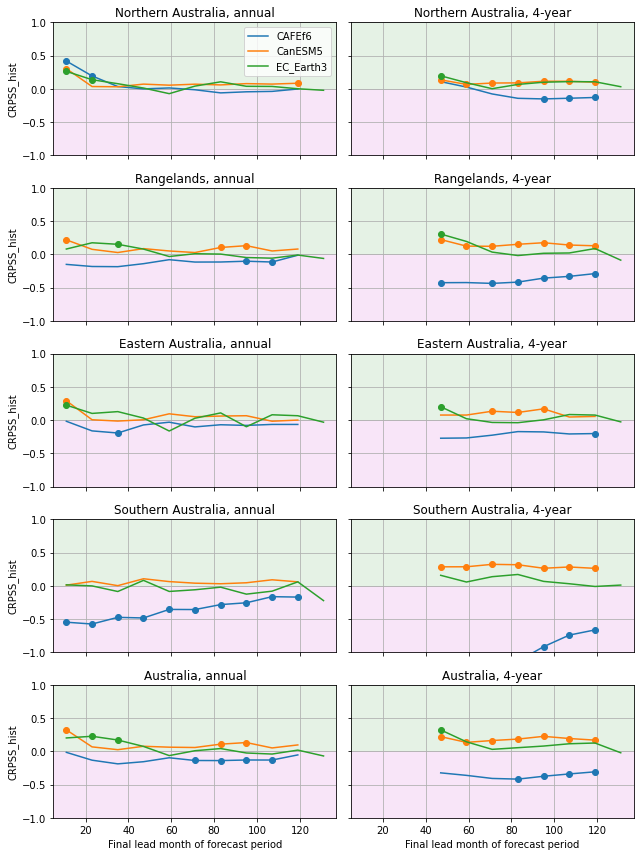

In [7]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["CRPSS_hist"],
)

## Precipitation relative to AGCD

### Anomaly correlation coefficient

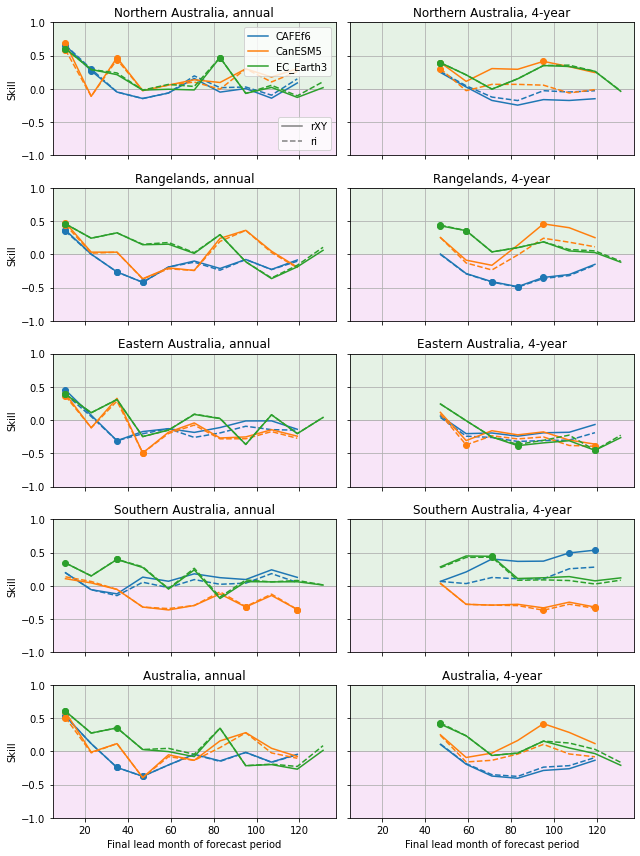

In [8]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY", "ri"],
)

### Mean squared skill score relative to historical simulations

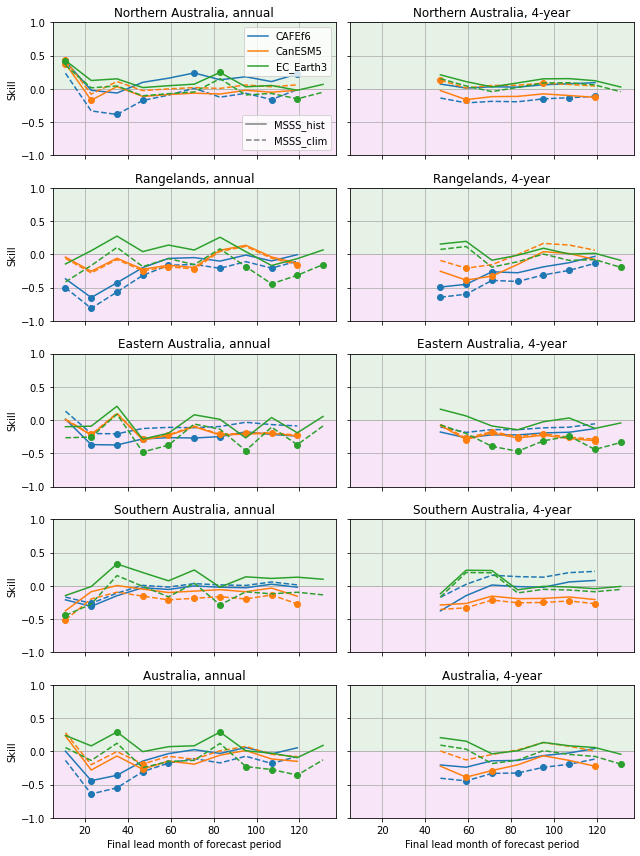

In [9]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS_hist", "MSSS_clim"],
)

### Rank probability skill score relative to historical simulations

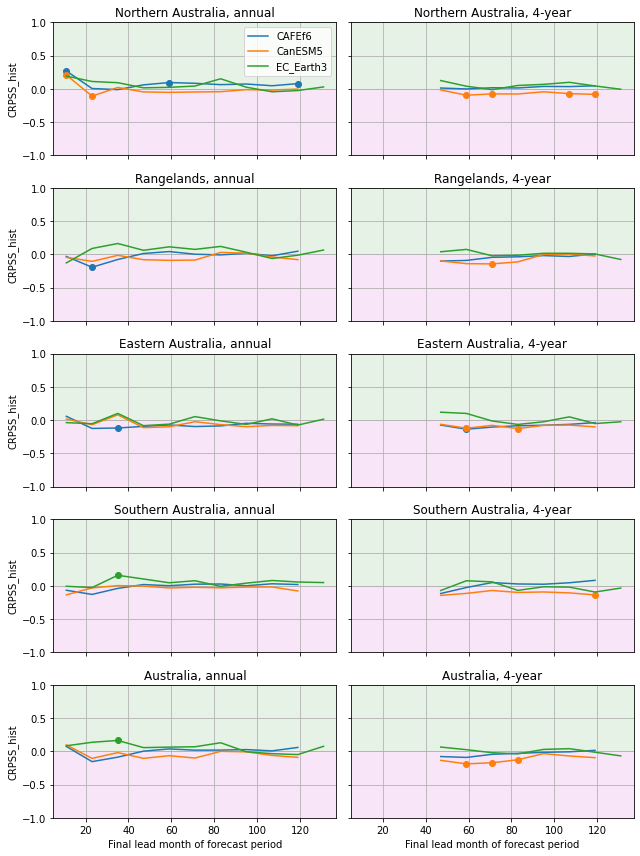

In [10]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["CRPSS_hist"],
)

## Near-surface (10m) wind relative to JRA55

### Anomaly correlation coefficient

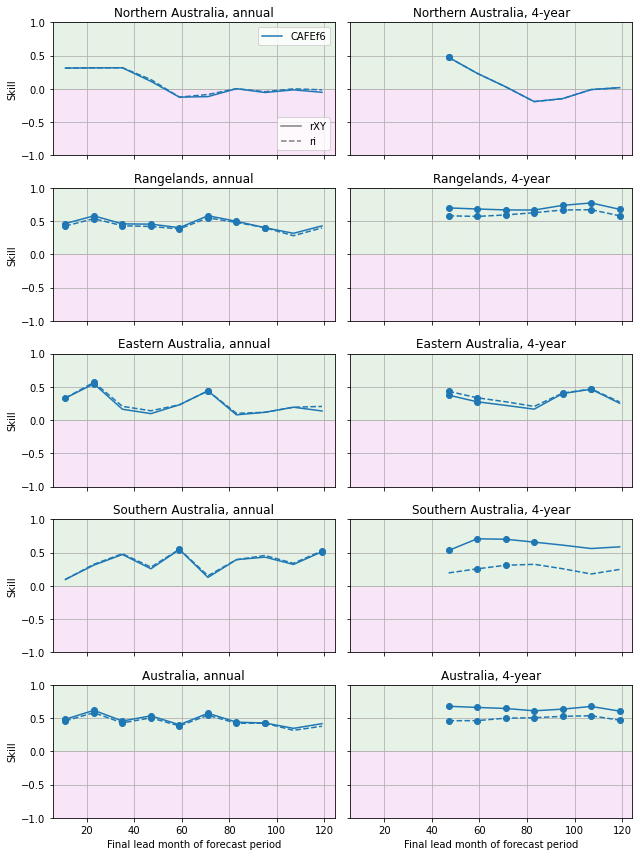

In [11]:
_ = plot_metrics(["CAFEf6"], "JRA55", ["annual", "4-year"], "V_tot", ["rXY", "ri"])

### Mean squared skill score relative to historical simulations

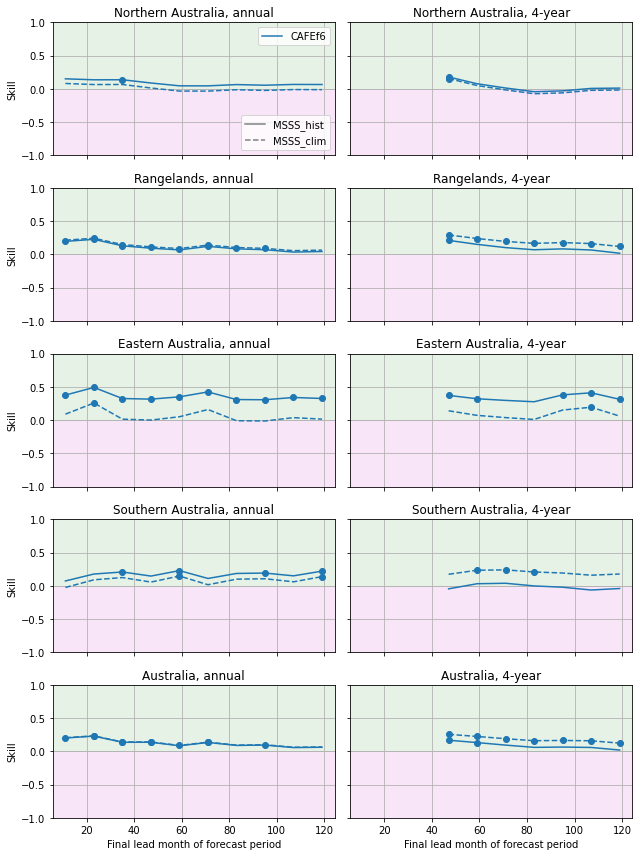

In [12]:
_ = plot_metrics(
    ["CAFEf6"], "JRA55", ["annual", "4-year"], "V_tot", ["MSSS_hist", "MSSS_clim"]
)

### Rank probability skill score relative to historical simulations

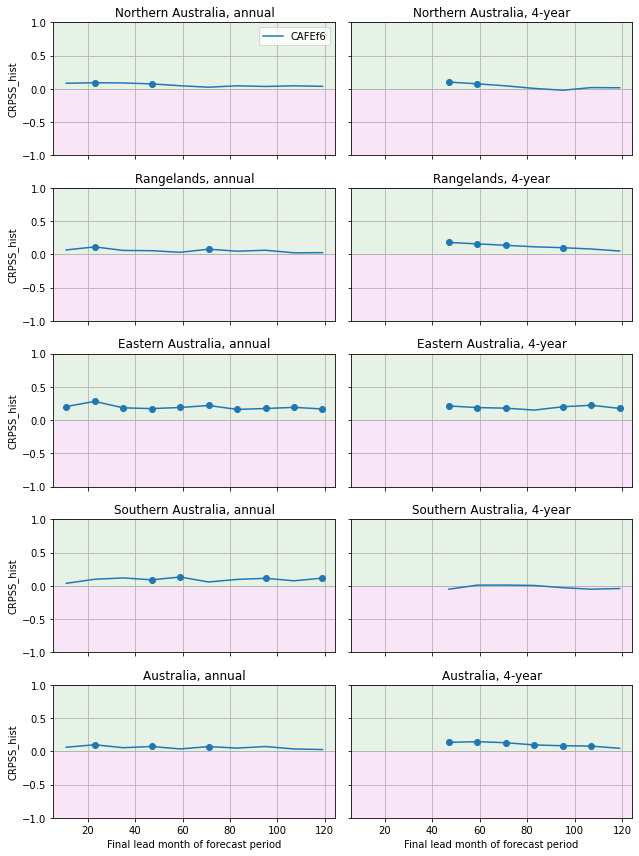

In [13]:
_ = plot_metrics(["CAFEf6"], "JRA55", ["annual", "4-year"], "V_tot", ["CRPSS_hist"])